### Chargement du dataset

In [47]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("abhi8923shriv/sentiment-analysis-dataset")

# Localiser le fichier CSV dans le dossier téléchargé
csv_train = f"{path}/train.csv"
csv_test = f"{path}/test.csv"

# Charger le fichier CSV dans un DataFrame
df_train = pd.read_csv(csv_train, encoding='ISO-8859-1')
df_test = pd.read_csv(csv_test, encoding='ISO-8859-1')

# Afficher les premières lignes
display(df_train.head())
display(df_test.head())

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [48]:
# Ne récupérer que text et sentiment
df_train = df_train[["text", "sentiment"]]
df_test = df_test[["text", "sentiment"]]

print ("Valeurs manquantes :")
display(df_train.isna().sum())
display(df_test.isna().sum())

display(df_train.loc[df_train['text'].isna()])
display(df_test.loc[df_test['text'].isna()])

df_train = df_train.dropna()
df_test = df_test.dropna()

print ("Doublons :")
display(df_train.duplicated().sum())
display(df_test.duplicated().sum())

print("Train :",df_train.shape)
display(df_train)

print("Test :",df_test.shape)
display(df_test)



Valeurs manquantes :


text         1
sentiment    0
dtype: int64

text         1281
sentiment    1281
dtype: int64

,text,sentiment
314,NaN,neutral


,text,sentiment
3534,NaN,NaN
3535,NaN,NaN
3536,NaN,NaN
3537,NaN,NaN
3538,NaN,NaN
...,...,...
4810,NaN,NaN
4811,NaN,NaN
4812,NaN,NaN
4813,NaN,NaN


Doublons :


np.int64(0)

np.int64(0)

Train : (27480, 2)


,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


Test : (3534, 2)


,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
...,...,...
3529,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,All alone in this old house again. Thanks for...,positive
3531,I know what you mean. My little dog is sinkin...,negative
3532,_sutra what is your next youtube video gonna b...,positive


### Preprocessing : tokenisation et filtrage

In [49]:
# Mise en minuscule 
df_train["text"] = df_train["text"].str.lower()
df_test["text"] = df_test["text"].str.lower()

# Tokenisation de chaque texte en mots
from nltk.tokenize import word_tokenize
df_train["text"] = df_train["text"].apply(word_tokenize)
df_test["text"] = df_test["text"].apply(word_tokenize)

display(df_train)
display(df_test)

,text,sentiment
0,"[i, `, d, have, responded, ,, if, i, were, going]",neutral
1,"[sooo, sad, i, will, miss, you, here, in, san,...",negative
2,"[my, boss, is, bullying, me, ...]",negative
3,"[what, interview, !, leave, me, alone]",negative
4,"[sons, of, *, *, *, *, ,, why, couldn, `, t, t...",negative
...,...,...
27476,"[wish, we, could, come, see, u, on, denver, hu...",negative
27477,"[i, `, ve, wondered, about, rake, to, ., the, ...",negative
27478,"[yay, good, for, both, of, you, ., enjoy, the,...",positive
27479,"[but, it, was, worth, it, *, *, *, *, .]",positive


,text,sentiment
0,"[last, session, of, the, day, http, :, //twitp...",neutral
1,"[shanghai, is, also, really, exciting, (, prec...",positive
2,"[recession, hit, veronique, branquinho, ,, she...",negative
3,"[happy, bday, !]",positive
4,"[http, :, //twitpic.com/4w75p, -, i, like, it,...",positive
...,...,...
3529,"[its, at, 3, am, ,, im, very, tired, but, i, c...",negative
3530,"[all, alone, in, this, old, house, again, ., t...",positive
3531,"[i, know, what, you, mean, ., my, little, dog,...",negative
3532,"[_sutra, what, is, your, next, youtube, video,...",positive


In [50]:
# Fonction de filtrage par regEx
import re
def regex_filtering(words):
    # Suppression . .. ... .... etc.
    words = [re.sub(r"\.+", '', word) for word in words]
    # Suppression nombres
    words = [re.sub(r"[0-9]+", '', word) for word in words]
    return (words)

df_train["text"]=df_train["text"].apply(regex_filtering)
df_test["text"]=df_test["text"].apply(regex_filtering)

display(df_train)
display(df_test)

,text,sentiment
0,"[i, `, d, have, responded, ,, if, i, were, going]",neutral
1,"[sooo, sad, i, will, miss, you, here, in, san,...",negative
2,"[my, boss, is, bullying, me, ]",negative
3,"[what, interview, !, leave, me, alone]",negative
4,"[sons, of, *, *, *, *, ,, why, couldn, `, t, t...",negative
...,...,...
27476,"[wish, we, could, come, see, u, on, denver, hu...",negative
27477,"[i, `, ve, wondered, about, rake, to, , the, c...",negative
27478,"[yay, good, for, both, of, you, , enjoy, the, ...",positive
27479,"[but, it, was, worth, it, *, *, *, *, ]",positive


,text,sentiment
0,"[last, session, of, the, day, http, :, //twitp...",neutral
1,"[shanghai, is, also, really, exciting, (, prec...",positive
2,"[recession, hit, veronique, branquinho, ,, she...",negative
3,"[happy, bday, !]",positive
4,"[http, :, //twitpiccom/wp, -, i, like, it, !, !]",positive
...,...,...
3529,"[its, at, , am, ,, im, very, tired, but, i, ca...",negative
3530,"[all, alone, in, this, old, house, again, , th...",positive
3531,"[i, know, what, you, mean, , my, little, dog, ...",negative
3532,"[_sutra, what, is, your, next, youtube, video,...",positive


In [51]:
# Récupération et augmentation des stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
new_stop_words = [",", ".", "`","``", "@", "*", "(", ")", "...", "!", "?", "-", "_", ">", "<", ":", "/", "=", "--", "©", "~", ";", "\\", "\\\\",""]
stop_words.update(new_stop_words)

# Fonction de filtrage par stop words
def stop_words_filtering(words):
    return ([x for x in words if x not in stop_words])

df_train["text"]=df_train["text"].apply(stop_words_filtering)
df_test["text"]=df_test["text"].apply(stop_words_filtering)

display(df_train)
display(df_test)

,text,sentiment
0,"[responded, going]",neutral
1,"[sooo, sad, miss, san, diego]",negative
2,"[boss, bullying]",negative
3,"[interview, leave, alone]",negative
4,"[sons, put, releases, already, bought]",negative
...,...,...
27476,"[wish, could, come, see, u, denver, husband, l...",negative
27477,"[wondered, rake, client, made, clear, net, for...",negative
27478,"[yay, good, enjoy, break, probably, need, hect...",positive
27479,[worth],positive


,text,sentiment
0,"[last, session, day, http, //twitpiccom/ezh]",neutral
1,"[shanghai, also, really, exciting, precisely, ...",positive
2,"[recession, hit, veronique, branquinho, quit, ...",negative
3,"[happy, bday]",positive
4,"[http, //twitpiccom/wp, like]",positive
...,...,...
3529,"[im, tired, sleep, try]",negative
3530,"[alone, old, house, thanks, net, keeps, alive,...",positive
3531,"[know, mean, little, dog, sinking, depression,...",negative
3532,"[_sutra, next, youtube, video, gon, na, love, ...",positive


### Histogrammes des mots positifs et négatifs

In [ ]:
# Concaténation des mots des textes positis, négatifs ou neutres
mots_pos = []
for comment in df_train.loc[df_train["sentiment"]=="positive","text"]:
    mots_pos.extend(comment)

mots_neg = []
for comment in df_train.loc[df_train["sentiment"]=="negative","text"]:
    mots_neg.extend(comment)

mots_neutr = []
for comment in df_train.loc[df_train["sentiment"]=="neutral","text"]:
    mots_neutr.extend(comment)

print (mots_pos)
print (mots_neg)
print (mots_neutr)

['feedings', 'baby', 'fun', 'smiles', 'coos', 'journey', 'wow', 'u', 'became', 'cooler', 'hehe', 'possible', 'really', 'really', 'like', 'song', 'love', 'story', 'taylor', 'swift', 'playing', 'ghost', 'online', 'really', 'interesting', 'new', 'updates', 'kirin', 'pet', 'metamorph', 'third', 'job', 'wait', 'dragon', 'pet', 'free', 'fillin', 'app', 'ipod', 'fun', 'im', 'addicted', 'juss', 'came', 'backk', 'berkeleyy', 'omg', 'madd', 'fun', 'havent', 'minute', 'whassqoodd', 'going', 'home', 'seen', 'new', 'twitter', 'design', 'quite', 'heavenly', 'hope', 'unni', 'make', 'audition', 'fighting', 'dahye', 'unni', 'funny', 'cute', 'kids', 'little', 'happy', 'wine', 'jeje', 'ok', 'sm', 'free', 'time', 'cares', 'jaja', 'love', 'day', 'im', 'avid', 'fan', 'magazine', 'love', 'magazines', 'love', 'available', 'pm', 'dear', 'would', 'love', 'help', 'convert', 'vidsã¯â¿â½', 'romance', 'zero', 'funny', 'better', 'way', 'spoil', 'mum', 'let', 'kick', 'back', 'relax', 'nice', 'meal', 'bottle', 'favori

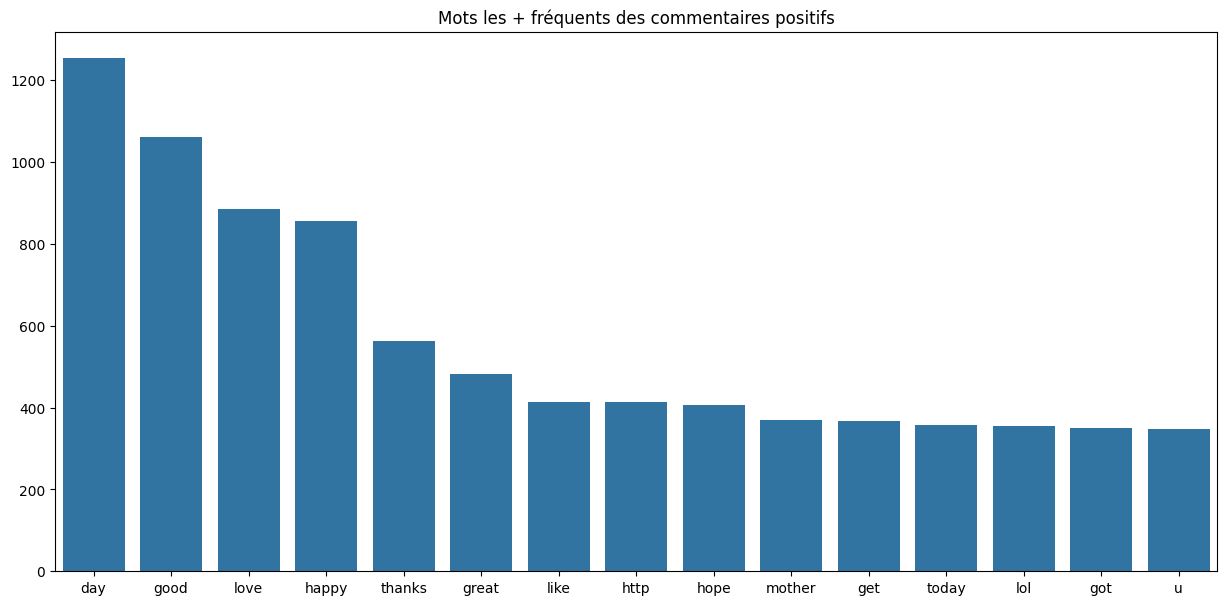

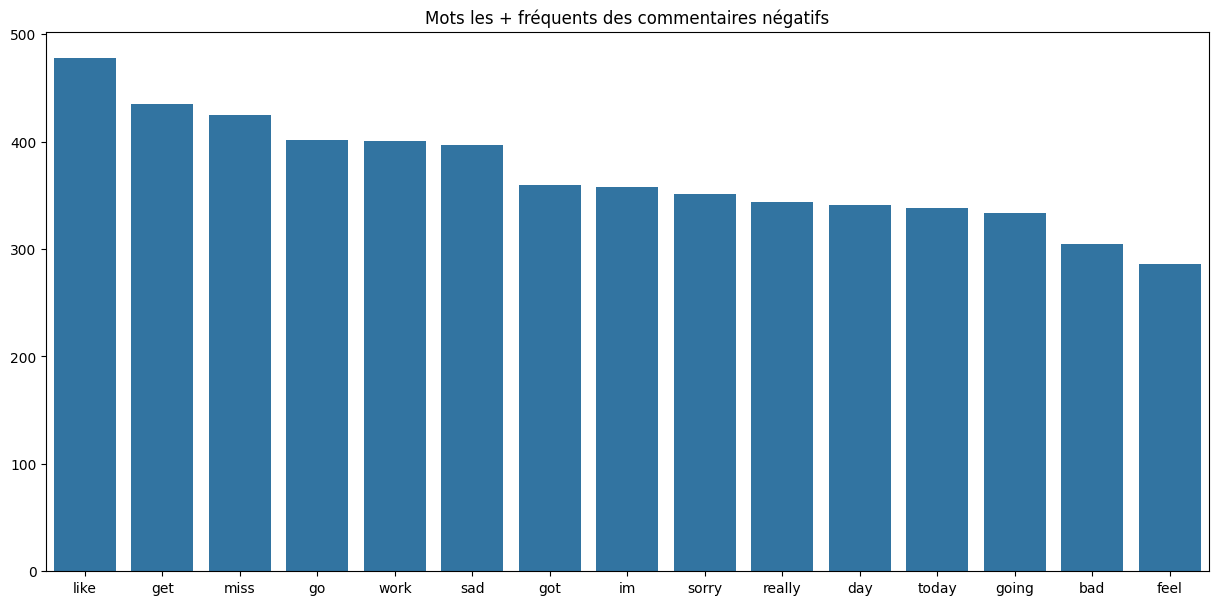

In [54]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage des mots les plus fréquents dans les commentaires positifs
dico_pos = Counter(mots_pos)
top15_pos = dico_pos.most_common(15)
plt.figure(figsize=(15,7))
sns.barplot(x=[top15[0] for top15 in top15_pos],y=[top15[1] for top15 in top15_pos])
plt.title("Mots les + fréquents des commentaires positifs")
plt.show()

# Affichage des mots les plus fréquents dans les commentaires négatifs
dico_neg = Counter(mots_neg)
top15_neg = dico_neg.most_common(15)
plt.figure(figsize=(15,7))
sns.barplot(x=[top15[0] for top15 in top15_neg],y=[top15[1] for top15 in top15_neg])
plt.title("Mots les + fréquents des commentaires négatifs")
plt.show()


### Preprocessing : normalisation et vectorisation

In [55]:
# Lemattiser les mots
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatisation(words) :
    lemm_words = [wordnet_lemmatizer.lemmatize(word) for word in words]
    return (list(set(lemm_words)))

df_train["text"]=df_train["text"].apply(lemmatisation)
df_test["text"]=df_test["text"].apply(lemmatisation)

display(df_train)
display(df_test)

,text,sentiment
0,"[responded, going]",neutral
1,"[diego, san, sooo, sad, miss]",negative
2,"[bullying, bos]",negative
3,"[interview, alone, leave]",negative
4,"[bought, release, son, put, already]",negative
...,...,...
27476,"[denver, u, job, wish, see, afford, lost, come...",negative
27477,"[#, wondered, force, made, clear, client, devs...",negative
27478,"[weekend, probably, enjoy, good, care, take, b...",positive
27479,[worth],positive


,text,sentiment
0,"[day, http, session, //twitpiccom/ezh, last]",neutral
1,"[bj, good, shanghai, also, precisely, tweeps, ...",positive
2,"[recession, veronique, hit, quit, shame, compa...",negative
3,"[happy, bday]",positive
4,"[like, http, //twitpiccom/wp]",positive
...,...,...
3529,"[tired, im, sleep, try]",negative
3530,"[kicking, alive, keep, old, house, na, alone, ...",positive
3531,"[mean, sinking, dog, move, know, tropical, lit...",negative
3532,"[na, youtube, _sutra, next, video, gon, love]",positive


In [ ]:
# Reconstitution des tokens en string (pour vectorisation)
def rebuild_string(words):
    return(" ".join(words))

df_train["text"]=df_train["text"].apply(rebuild_string)
df_test["text"]=df_test["text"].apply(rebuild_string)

display(df_train)
display(df_test)

,text,sentiment
0,responded going,neutral
1,diego san sooo sad miss,negative
2,bullying bos,negative
3,interview alone leave,negative
4,bought release son put already,negative
...,...,...
27476,denver u job wish see afford lost come could h...,negative
27477,# wondered force made clear client devs agile ...,negative
27478,weekend probably enjoy good care take break ne...,positive
27479,worth,positive


,text,sentiment
0,day http session //twitpiccom/ezh last,neutral
1,bj good shanghai also precisely tweeps china s...,positive
2,recession veronique hit quit shame company bra...,negative
3,happy bday,positive
4,like http //twitpiccom/wp,positive
...,...,...
3529,tired im sleep try,negative
3530,kicking alive keep old house na alone hair tha...,positive
3531,mean sinking dog move know tropical little som...,negative
3532,na youtube _sutra next video gon love,positive


In [59]:
# Séparation feature, target
X_train = df_train['text']
y_train = df_train['sentiment']
X_test = df_test['text']
y_test = df_test['sentiment']

# Vectorisation TF-IDF
from  sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()
X_train_vect = vectorizer_tfidf.fit_transform(X_train)
X_test_vect = vectorizer_tfidf.transform(X_test)

print ("Vocabulaire :")
print (vectorizer_tfidf.vocabulary_)

Vocabulaire :
{'responded': 17186, 'going': 8842, 'diego': 6086, 'san': 17762, 'sooo': 18996, 'sad': 17682, 'miss': 13438, 'bullying': 3588, 'bos': 3217, 'interview': 10674, 'alone': 1457, 'leave': 12007, 'bought': 3238, 'release': 17019, 'son': 18975, 'put': 16475, 'already': 1470, 'shameless': 18201, 'forum': 8132, 'http': 10101, 'best': 2748, 'ranger': 16704, 'wwwdothebouncycom': 23096, 'smf': 18793, 'earth': 6739, 'plugging': 15850, 'baby': 2263, 'coo': 5052, 'fun': 8361, 'smile': 18796, 'feeding': 7666, 'soooo': 18998, 'high': 9785, 'possible': 16018, 'became': 2610, 'cooler': 5065, 'wow': 22979, 'journey': 11232, 'hehe': 9662, 'much': 13811, 'reckon': 16856, 'hopeful': 9987, 'stuff': 19612, 'na': 13964, 'minimal': 13381, 'chance': 4169, 'get': 8644, 'cake': 3769, 'never': 14187, 'gon': 8857, 'love': 12498, 'song': 18977, 'swift': 19973, 'story': 19501, 'like': 12175, 'taylor': 20188, 'really': 16804, 'low': 12530, 'running': 17612, 'dangerously': 5610, 'sharpie': 18229, 'ink': 10

### Entraînement Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators = 100,learning_rate = 1.0,max_depth = 1,random_state = 0)
clf.fit(X_train_vect,y_train)
y_pred = clf.predict(X_test_vect)

In [62]:
from sklearn.metrics import classification_report

print (classification_report(y_test,y_pred))
display(pd.crosstab(y_test,y_pred,rownames=["Réel"],colnames=["Prédit"]))

              precision    recall  f1-score   support

    negative       0.75      0.58      0.65      1001
     neutral       0.62      0.78      0.69      1430
    positive       0.80      0.69      0.74      1103

    accuracy                           0.70      3534
   macro avg       0.72      0.69      0.70      3534
weighted avg       0.71      0.70      0.70      3534



Prédit,negative,neutral,positive
Réel,,,
negative,583,373,45
neutral,166,1121,143
positive,31,309,763
